# DTDmodel: Debris Thermal Diffusivity model

### Info on this notebook:
In this jupyter notebook you can create your own debris thermal diffusivity data. You can select between a sinusoidal and a skewed sine forcing.

Please beware that this is just a beta-version and changes will happen in the near future.
Also when executing this file online it may take several minutues.

#### Python Librarys required:

* NumPy (v1.20.0)
* Matplotlib (v3.4.1)
* Pandas (v1.2.4)
* DateTime (v4.3)
* SciPy (v1.6.2)
* TQDM (v4.59.0)

Program code was tested with the stated library versions, but should also work flawlessly with every other recent version.

## Introduction

## Methods

Crank, J.; Nicolson, P. (1947). "A practical method for numerical evaluation of solutions of partial differential equations of the heat conduction type". Proc. Camb. Phil. Soc. 43 (1): 50–67. <doi:10.1017/S0305004100023197>

### Load librarys:

In [1]:
import numpy as np
from random import seed

import plotfunction
import functions

### Select model properties:

In [2]:
model_type = ['pure_sine','skewed_sine']
sel_model = model_type[0]

# Add artificial measurement uncertainty (°K)
sel_uncertainty = False
uncertainty = 0.01

sel_x_uncertainty = True
mu = 0
sigma = 0.005

# variables
days = 10  # number of simulated days (set automatically for example data)
neglect_days = 2

k = 5*10**(-7)  # thermal conductivity
layer_thickness = 1.0

# random seed for reproducability
seed(0)

save_figure = True


### Define numerical grid:

In [3]:
# spacial grid
dx = 0.02
max_depth = layer_thickness
depths = np.arange(0, max_depth + dx, dx)
n_depths = len(depths)



# temporal grid

dt = 5*60 # temporal sampling interval (set automatically for example data)
t_max = days*60*60*24
time = np.arange(0, t_max + dt, dt)
nt = len(time)
convert = 60*60

if sel_model[:7] == "example":
    dt = 60*5
    days = 10
    t_max = days*60*60*24
    time = np.arange(0, t_max + dt, dt)
    nt = len(time)

In [4]:
r = k*dt/dx**2
print(round(r,4))
if r >= 0.5:
    print('Instability: von Neumann stability condition not fullfilled')

0.375


In [5]:
"""main function"""
# initial temperature profile 
top_mean_T = 7.5 # mean layer temperature of uppermost layer (only relevant for non real data)
osci_amplitude = 7.5 
T = np.linspace(top_mean_T, 0, num=n_depths)
Tout = functions.crank_nicolson(T, r, n_depths, nt, time, dt, top_mean_T, osci_amplitude, sel_model)

100%|██████████| 2880/2880 [00:00<00:00, 6205.91it/s]

0.37499999999999994


### Discretize Temperature resolution
So far the model calculated "perfect" temperature values with a precision of less than 10^-8 ºC. Since there are no such perfect thermistors in real life, you can select the discretization intervall of your choice (e.g. 0.1 ºC).


In [6]:
# discretize data
if sel_uncertainty:
    Tout = (1/uncertainty*Tout).round(0)*uncertainty
    
import random 
import matplotlib.pyplot as plt 
    
# store the random numbers in a list 
if sel_x_uncertainty:
    for i in range(len(depths)): 
        depths[i] = np.round(np.abs(depths[i] + random.gauss(mu, sigma)),3)

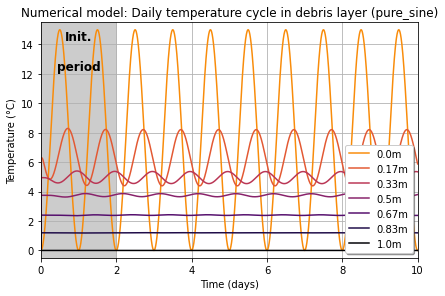

In [7]:
plotfunction.model_timeseries(Tout, n_depths, max_depth, time, convert, layer_thickness, neglect_days, sel_model, save_figure)

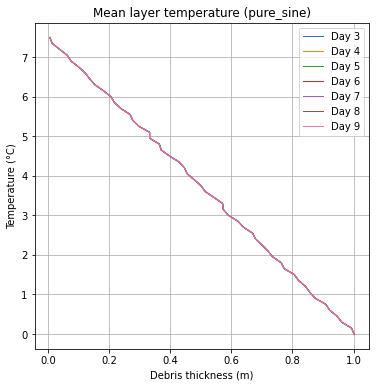

In [8]:
plotfunction.mean_layer_temp(Tout, n_depths, depths, dt, days, layer_thickness, neglect_days, sel_model, save_figure)

### Export data as .csv file 
To save this file you might have to execute it on your own computer.

In [9]:
functions.export_csv_file(Tout, dt, model_type, depths, layer_thickness, days,
                          neglect_days, sel_model)